![Loan](loan.png)

## Importing the necessary libraries and loading the dataset itself

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
loan_data = pd.read_csv('C:/Users/sogor/OneDrive/Documents/DataScientist_practice/eligibility_for_loan.csv')

In [3]:
# Quick overview of my dataset

loan_data.sample(7)

Loan_ID  Gender Married Dependents     Education Self_Employed  \
480  LP002534  Female      No          0  Not Graduate            No   
413  LP002332    Male     Yes          0  Not Graduate            No   
206  LP001693  Female      No          0      Graduate            No   
142  LP001504    Male      No          0      Graduate           Yes   
205  LP001692  Female      No          0  Not Graduate            No   
528  LP002714    Male      No          1  Not Graduate            No   
130  LP001469    Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
480             4350                0.0       154.0             360.0   
413             2253             2033.0       110.0             360.0   
206             3244                0.0        80.0             360.0   
142             6950                0.0       175.0             180.0   
205             4408                0.0       120.0             360.0   
528             2679             1302.0        94.0             360.0   
130            20166                0.0       650.0             480.0   

     Credit_History Property_Area Loan_Status  
480             1.0         Rural           Y  
413             1.0         Rural           Y  
206             1.0         Urban           Y  
142             1.0     Semiurban           Y  
205             1.0     Semiurban           Y  
528             1.0     Semiurban           Y  
130             NaN         Urban           Y

In [4]:
# Getting more information about my dataset (data types and missing elements)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Fixing missing values and addressing duplicate rows

In [5]:
loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# For these columns, it is wiser to fill them with the most frequently occurring item 
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace = True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace = True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace = True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace = True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace = True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace = True)

# For this column, it is wiser to fill it with the "average" number 
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace = True)

In [7]:
loan_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Luckily I managed to solve this missing value problem.

In [8]:
# I'm going to drop this pointless column
loan_data = loan_data.drop('Loan_ID', axis=1) 

In [9]:
loan_data.loc[loan_data.duplicated()]

Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []

There are no duplicates, so perfect.

In [10]:
# Quick statistical overview 
loan_data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.412162        342.410423   
std        6109.041673        2926.248369   84.037468         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

We can make the following conclusions about the data:
- ApplicantIncome, CoapplicantIncome, and LoanAmount have widely spread values as indicated by the high standard deviations and large ranges. These variables exhibit a significant variation in values, suggesting the presence of outliers or a diverse range of incomes and loan amounts in the dataset.

## Exploring Data Analysis (EDA)

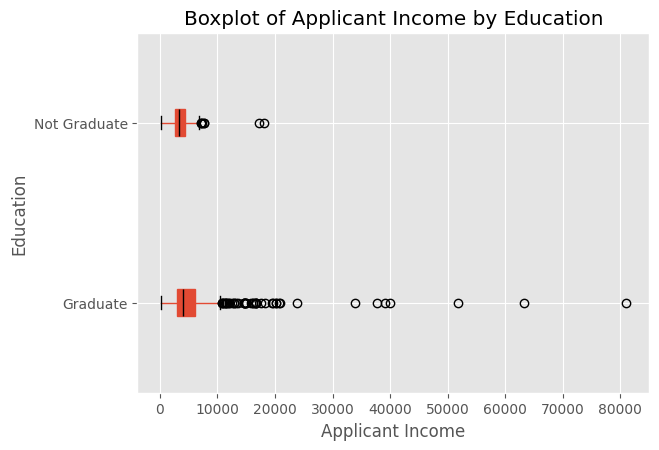

In [11]:
plt.style.use('ggplot')

# Create a boxplot with 'Education' as the grouping variable
loan_data.boxplot(column='ApplicantIncome', by='Education', vert=False, patch_artist=True, medianprops={'color':'black'})

# Customize the plot
plt.title('Boxplot of Applicant Income by Education')
plt.xlabel('Applicant Income')
plt.ylabel('Education')
plt.suptitle('')  # Remove default title

plt.show()

It seems that graduated people have a much higher income than those who are not graduated. 

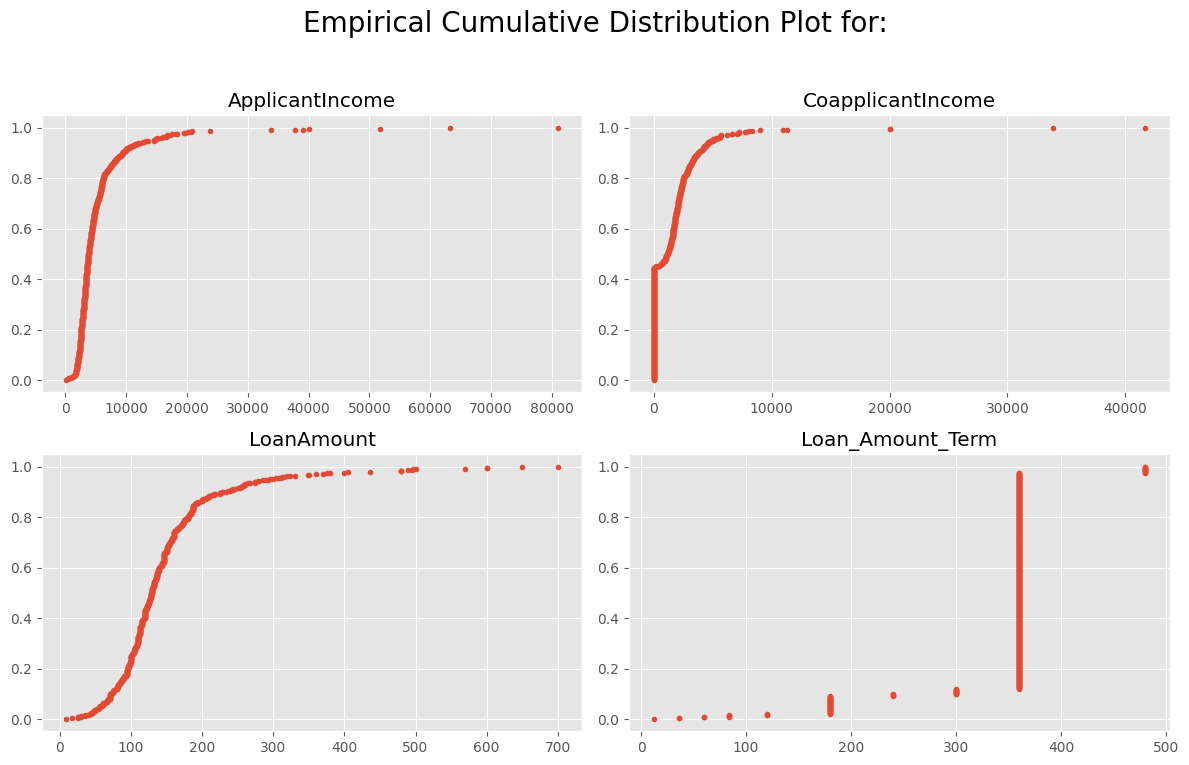

In [12]:
def ecdf_graph(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n # this line is used to create a set of evenly spaced values representing the cumulative probability
    return x, y

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.suptitle('Empirical Cumulative Distribution Plot for:', size=20)

# Plot ECDFs
for i, col in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']):
    x, y = ecdf_graph(loan_data[col].dropna())
    axes[i // 2, i % 2].plot(x, y, marker='.', linestyle='none')
    axes[i // 2, i % 2].set_title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # adjusts the position of the main title to prevent overlapping
plt.show()

We can tell the followings:
1. "ApplicantIncome":  The curve rises steeply at the beginning, it indicates that a significant proportion of applicants have lower incomes and also the curve levels off at higher values, it suggests that only a small percentage of applicants have very high incomes.
2. "CoapplicantIncome": Similar to ApplicantIncome rises steeply, it indicates a concentration of lower co-applicant incomes.
3. "LoanAmount": A steep initial rise indicates lower loan amounts, while a flatter section on the right suggests higher loan amounts. We can observe that the majority of applicants prefer a lower amount of loan.
4. "Loan_Amount_Term": A more gradual rise may suggest a broader range of loan terms. We can see a peak around 350, which suggests that there is a specific term or duration that is more prevalent in the dataset and also might indicate a preference among borrowers for a specific loan term.

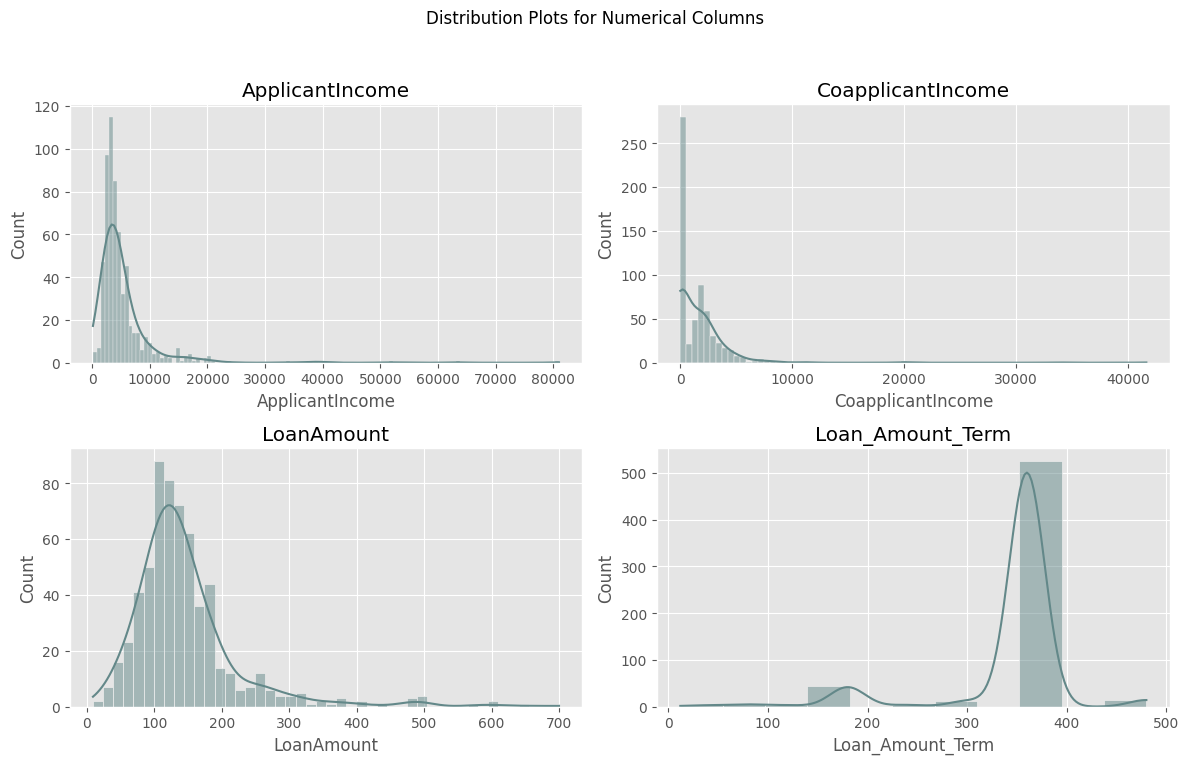

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.suptitle('Distribution Plots for Numerical Columns')

# Plot histplots for numerical columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for i, col in enumerate(numerical_columns):
    sns.histplot(loan_data[col].dropna(), kde=True, ax=axes[i // 2, i % 2], color='#638889')
    axes[i // 2, i % 2].set_title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

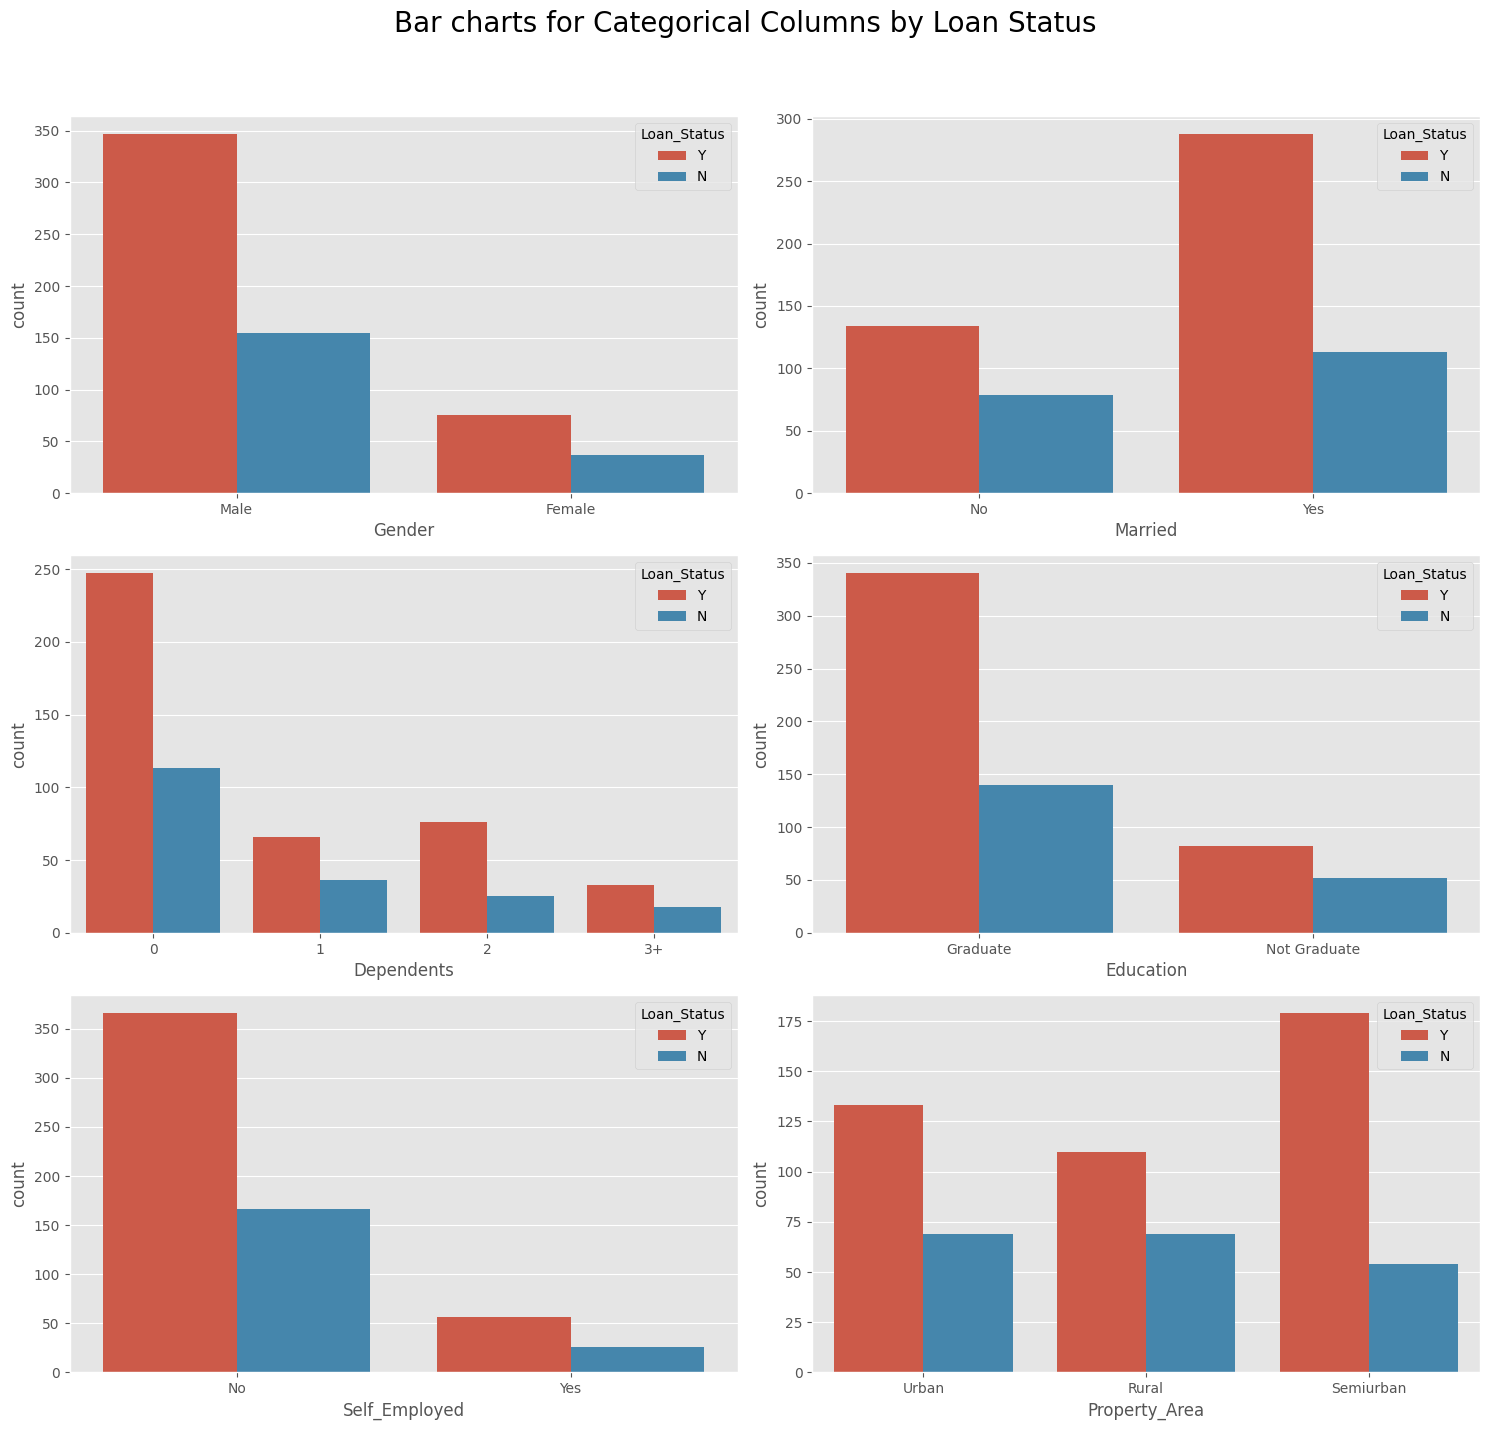

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
plt.suptitle('Bar charts for Categorical Columns by Loan Status', size=20)

# Plot count plots for categorical columns
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue='Loan_Status', data=loan_data, ax=axes[i // 2, i % 2])

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # adjusts the position of the main title to prevent overlapping
plt.show()

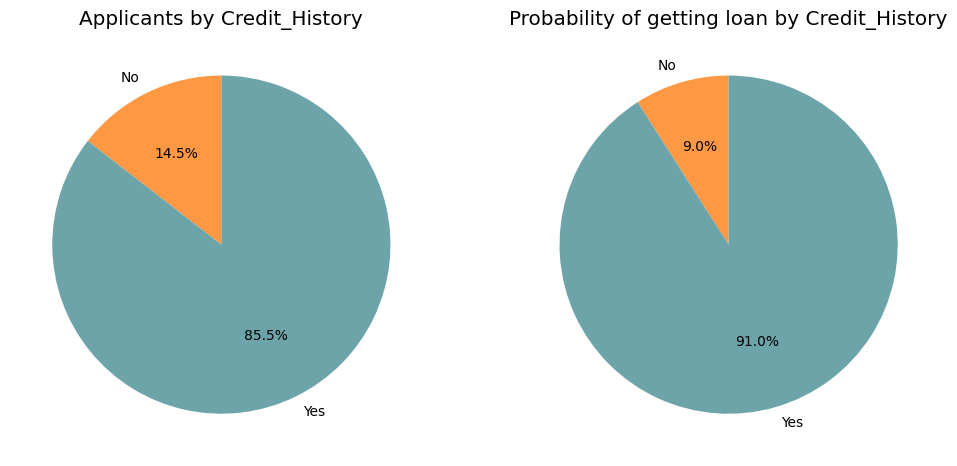

In [15]:
fetch = loan_data['Credit_History'].value_counts(ascending=True)

# Probability of getting loan by Credit_History
probability_of_getting_loan = loan_data.pivot_table(
    values='Loan_Status',
    index=['Credit_History'],
    aggfunc=lambda x: x.map({'Y': 1, 'N': 0}).mean()
)

# Set custom colors for the pie charts
colors = ['#FF9843', '#6DA4AA']

# Map labels for Credit_History
credit_history_labels = {0: 'No', 1: 'Yes'}

# Plot as pie charts
fig, axes = plt.subplots(figsize=(12, 8), nrows=1, ncols=2)

# Plotting count of applicants by Credit_History as a pie chart
axes[0].pie(fetch, labels=fetch.index.map(credit_history_labels), autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_title('Applicants by Credit_History')

# Plotting probability of getting loan by Credit_History as a pie chart
axes[1].pie(probability_of_getting_loan['Loan_Status'], labels=probability_of_getting_loan.index.map(credit_history_labels), autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Probability of getting loan by Credit_History')

plt.show()

First pie chart suggests that a significant portion of the applicants in the dataset has a positive credit history. The second pie chart shows that having a positive credit history significantly increases the chances of getting approved for a loan. 

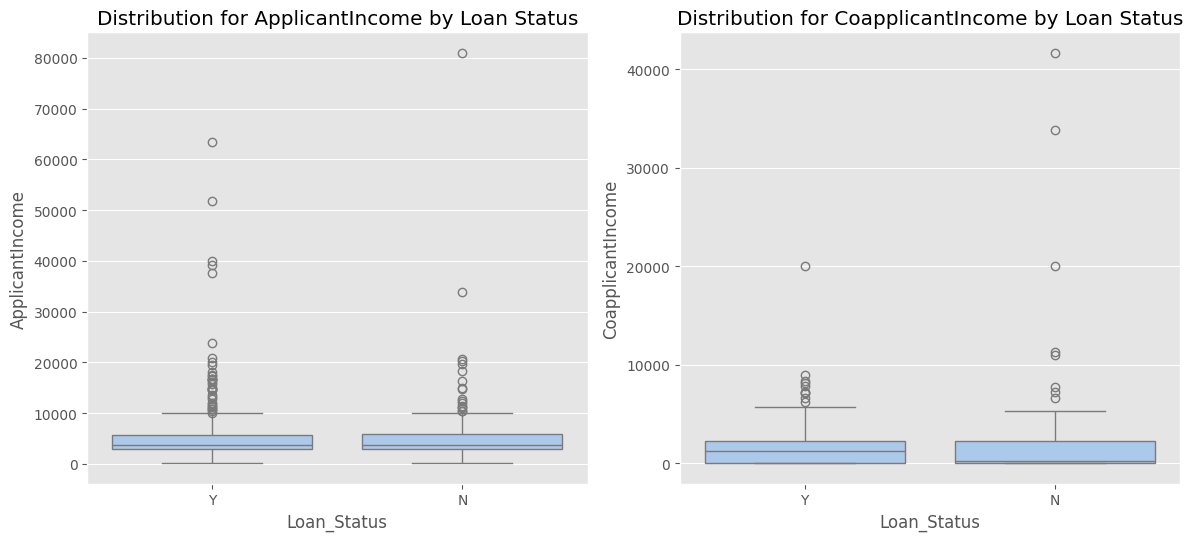

In [16]:
sns.set_palette("pastel")

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=loan_data, ax=axes[0])
axes[0].set_title('Distribution for ApplicantIncome by Loan Status')

sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=loan_data, ax=axes[1])
axes[1].set_title('Distribution for CoapplicantIncome by Loan Status')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [17]:
fig = px.histogram(loan_data, x='LoanAmount', color='Loan_Status', title='Histogram of LoanAmount by Loan Status', opacity=0.5)
fig.show()

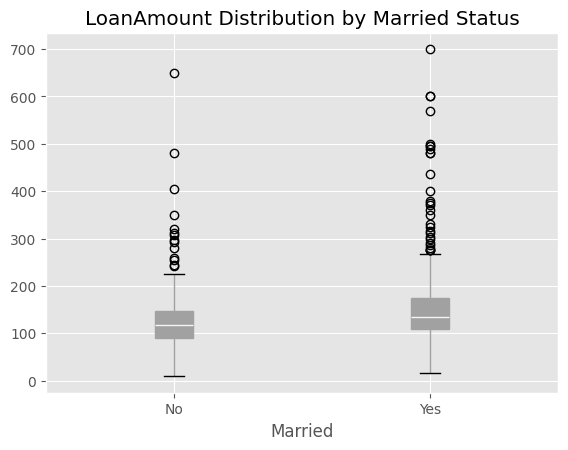

In [18]:
loan_data.boxplot(column='LoanAmount', by='Married', patch_artist=True)
plt.title('LoanAmount Distribution by Married Status')
plt.suptitle('')
plt.show()

Married individuals tend to take out higher loans. A logical reason for this could be that they are building a place to live for their children, among other factors.

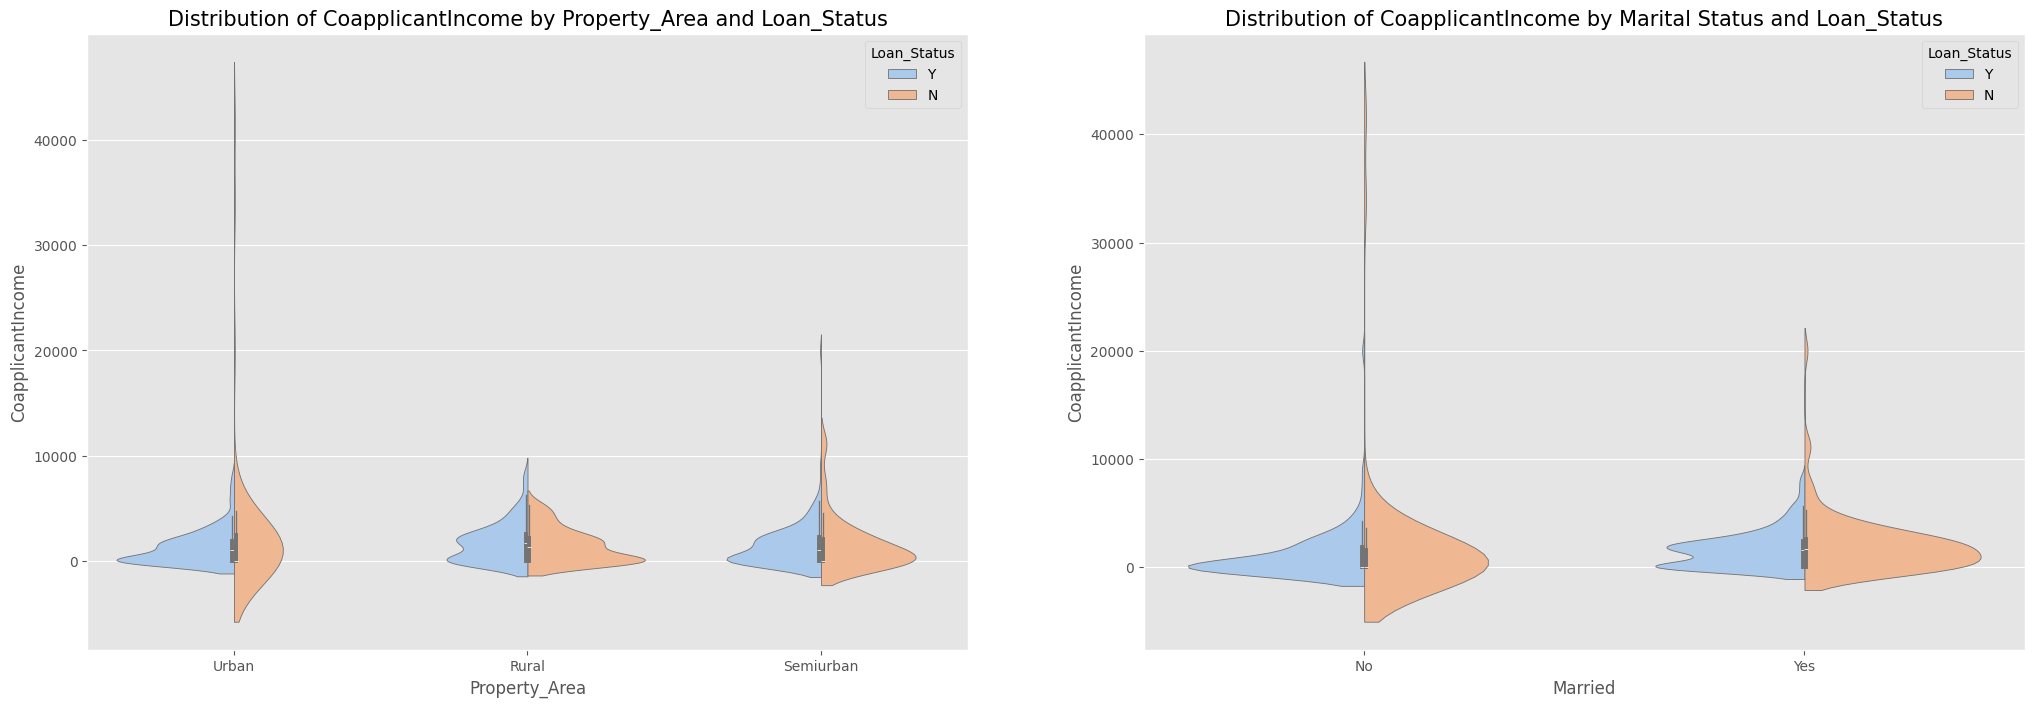

In [19]:
f, ax = plt.subplots(1, 2, figsize=(25, 8))

sns.violinplot(x="Property_Area", y="CoapplicantIncome", hue="Loan_Status", data=loan_data, split=True, ax=ax[0])
ax[0].set_title('Distribution of CoapplicantIncome by Property_Area and Loan_Status', size=15)
ax[0].set_yticks(range(0, 50000, 10000))

sns.violinplot(x="Married", y="CoapplicantIncome", hue="Loan_Status", data=loan_data, split=True, ax=ax[1])
ax[1].set_title('Distribution of CoapplicantIncome by Marital Status and Loan_Status', size=15)
ax[1].set_yticks(range(0, 50000, 10000))

plt.show()

In [20]:
fig = px.scatter_3d(loan_data, x='ApplicantIncome', y='CoapplicantIncome', z='LoanAmount', color='Loan_Status', title='Relationship Between ApplicantIncome, CoapplicantIncome looking at LoanAmount by Loan Status')
fig.show()

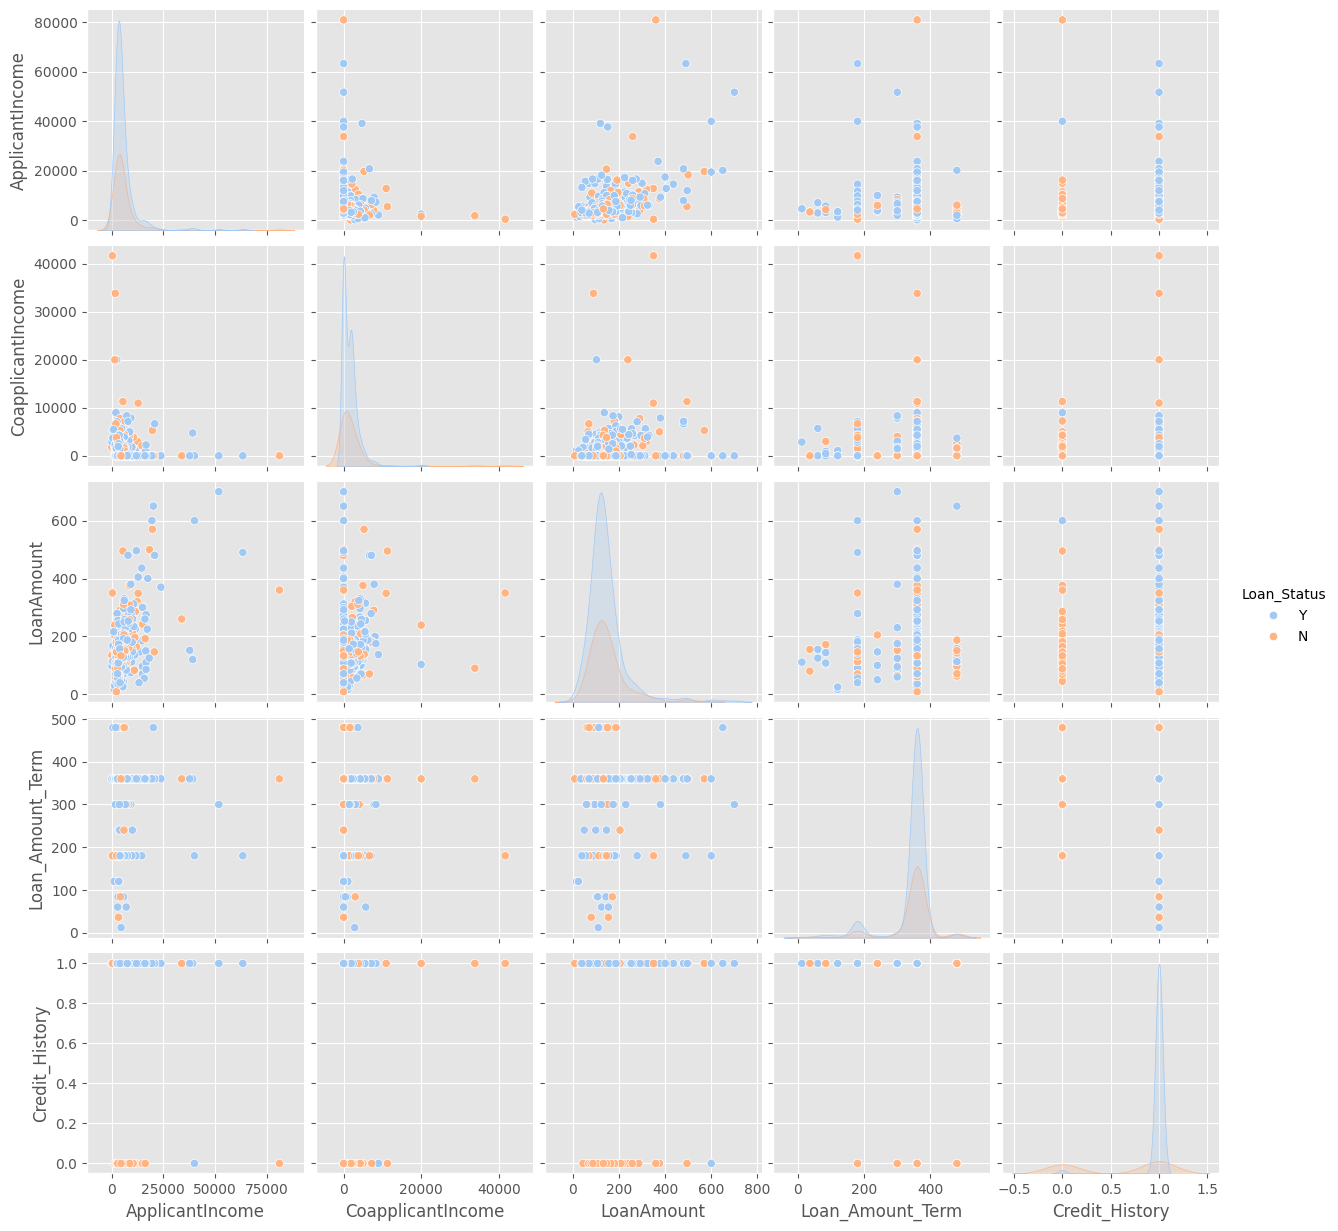

In [21]:
sns.pairplot(loan_data, diag_kind='kde', hue='Loan_Status')
plt.show()

## Data preprocessing before model training

In [22]:
# I checked again the columns from my dataset
loan_data.tail()

Gender Married Dependents Education Self_Employed  ApplicantIncome  \
609  Female      No          0  Graduate            No             2900   
610    Male     Yes         3+  Graduate            No             4106   
611    Male     Yes          1  Graduate            No             8072   
612    Male     Yes          2  Graduate            No             7583   
613  Female      No          0  Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

    Property_Area Loan_Status  
609         Rural           Y  
610         Rural           Y  
611         Urban           Y  
612         Urban           Y  
613     Semiurban           N

In [23]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [24]:
# Encoding categorical columns into numericals

loan_data['Loan_Status'] = loan_data['Loan_Status'].replace({'Y': 1, 'N': 0})
loan_data['Property_Area'] = loan_data['Property_Area'].replace({'Urban': 0, 'Rural': 1, 'Semiurban': 2})
loan_data['Self_Employed'] = loan_data['Self_Employed'].replace({'No': 0, 'Yes': 1})
loan_data['Education'] = loan_data['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
loan_data['Married'] = loan_data['Married'].replace({'Yes': 1, 'No': 0})
loan_data['Dependents'] = loan_data['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3})
loan_data['Gender'] = loan_data['Gender'].replace({'Male': 1, 'Female': 0})

In [25]:
# They are looking better to be integers rather than float so I transformed them
loan_data['Credit_History'] = loan_data['Credit_History'].astype(int)
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].astype(int)
loan_data['CoapplicantIncome'] = loan_data['CoapplicantIncome'].astype(int)
loan_data['LoanAmount'] = loan_data['LoanAmount'].astype(int)

In [26]:
loan_data.dtypes

Gender               int64
Married              int64
Dependents           int64
Education            int64
Self_Employed        int64
ApplicantIncome      int64
CoapplicantIncome    int32
LoanAmount           int32
Loan_Amount_Term     int32
Credit_History       int32
Property_Area        int64
Loan_Status          int64
dtype: object

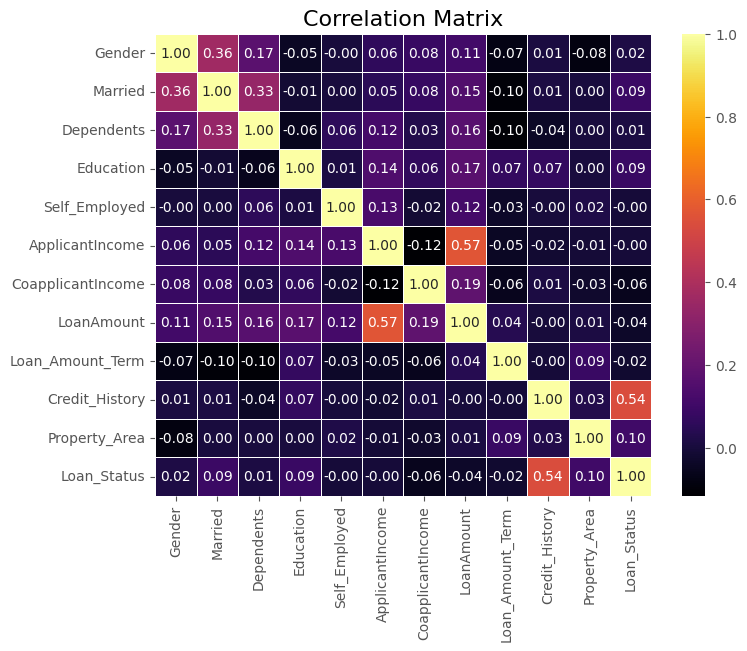

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(loan_data.corr(), annot=True, cmap='inferno', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix', fontsize=16)
plt.show()

We can notice a significant correlation between "LoanAmount" and "ApplicantIncome". Moreover we have a positive significant correlation between our target 🎯 varibale "Loan_Status" and "Credit_History".

## Data separation

In [28]:
X = loan_data.drop('Loan_Status', axis = 1)
y = loan_data['Loan_Status']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [30]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix, accuracy_score

## Scaling the data
StandardScaler standardizes the features by removing the mean and scaling to unit variance. In other word standardization brings all features to a common scale, preventing some features from dominating others.

In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Applying machine learning algorithms

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=10, C=1.0, class_weight='balanced', penalty='l2')
lr.fit(X_train, y_train)
 
y_pred = lr.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print(cm, acc_score) 

[[ 33  30]
 [ 14 108]] 0.7621621621621621


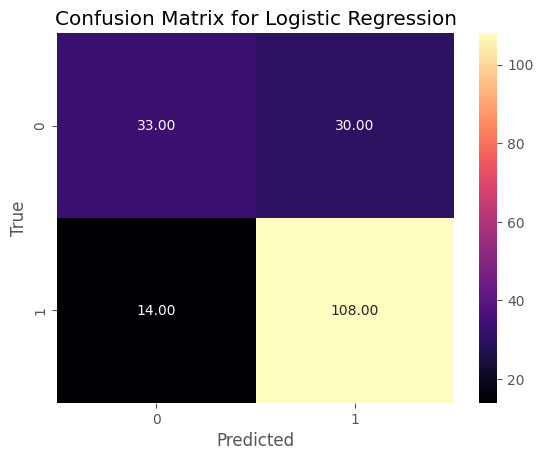

In [34]:
sns.heatmap(cm, annot=True, fmt='.2f', cmap='magma') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [35]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=10, max_features='sqrt')
dtc.fit(X_train, y_train)

y_pred2 = dtc.predict(X_test)

In [36]:
cm2 = confusion_matrix(y_test, y_pred2)
acc_score2 = accuracy_score(y_test, y_pred2)
print(cm2, acc_score2)

[[ 26  37]
 [  8 114]] 0.7567567567567568


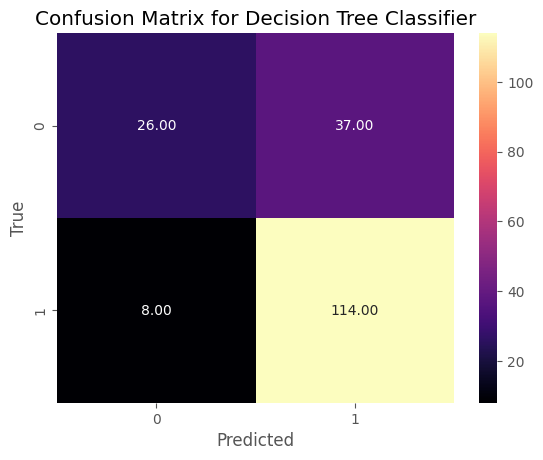

In [37]:
sns.heatmap(cm2, annot=True, fmt='.2f', cmap='magma') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [38]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=4, min_samples_leaf=2)  
rfc.fit(X_train, y_train) 

y_pred3 = rfc.predict(X_test)

In [39]:
cm3 = confusion_matrix(y_test, y_pred3)
acc_score3 = accuracy_score(y_test, y_pred3)
print(cm3, acc_score3)

[[ 26  37]
 [  3 119]] 0.7837837837837838


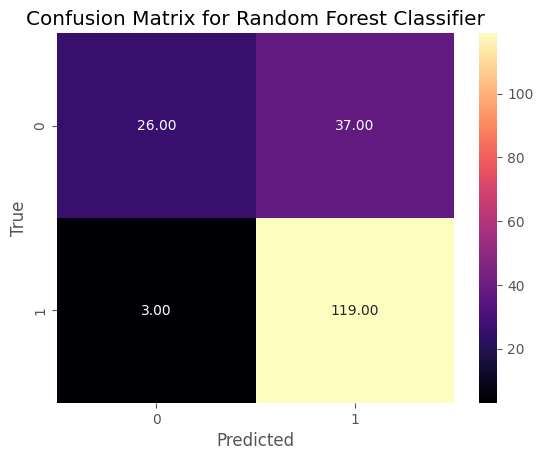

In [40]:
sns.heatmap(cm3, annot=True, fmt='.2f', cmap='magma') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [41]:
from sklearn.naive_bayes import GaussianNB  

nb = GaussianNB()  
nb.fit(X_train, y_train)

y_pred4 = nb.predict(X_test)

In [42]:
cm4 = confusion_matrix(y_test, y_pred4)
acc_score4 = accuracy_score(y_test, y_pred4)
print(cm4, acc_score4)

[[ 27  36]
 [  8 114]] 0.7621621621621621


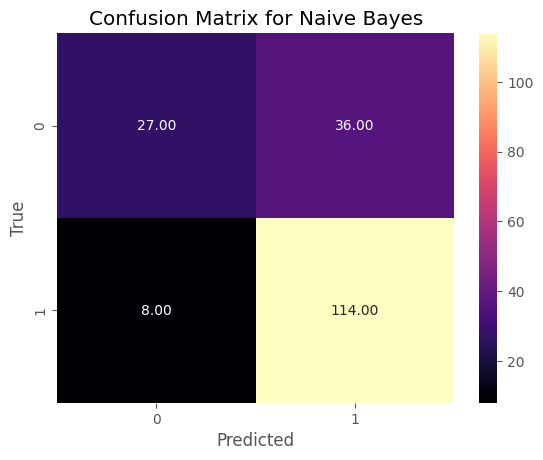

In [43]:
sns.heatmap(cm4, annot=True, fmt='.2f', cmap='magma') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

In [44]:
from sklearn.neighbors import KNeighborsClassifier  

knn= KNeighborsClassifier(n_neighbors=10)  
knn.fit(X_train, y_train) 

y_pred5 = knn.predict(X_test)

In [45]:
cm5 = confusion_matrix(y_test, y_pred5)
acc_score5 = accuracy_score(y_test, y_pred5)
print(cm5, acc_score5)

[[ 24  39]
 [  6 116]] 0.7567567567567568


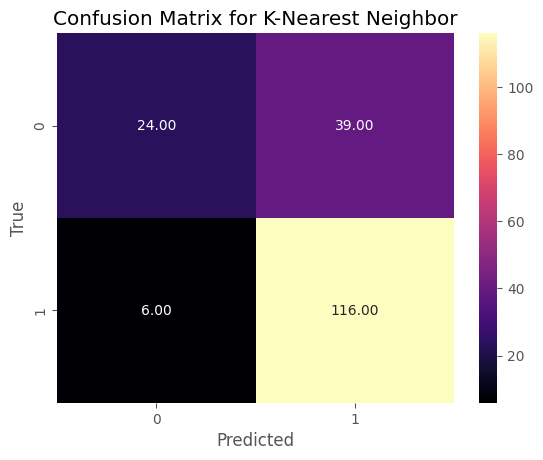

In [46]:
sns.heatmap(cm5, annot=True, fmt='.2f', cmap='magma') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for K-Nearest Neighbor')
plt.show()

In [47]:
from sklearn.svm import SVC 

svc = SVC()  
svc.fit(X_train, y_train)  

y_pred6 = svc.predict(X_test)

In [48]:
cm6 = confusion_matrix(y_test, y_pred6)
acc_score6 = accuracy_score(y_test, y_pred6)
print(cm6, acc_score6)

[[ 25  38]
 [  3 119]] 0.7783783783783784


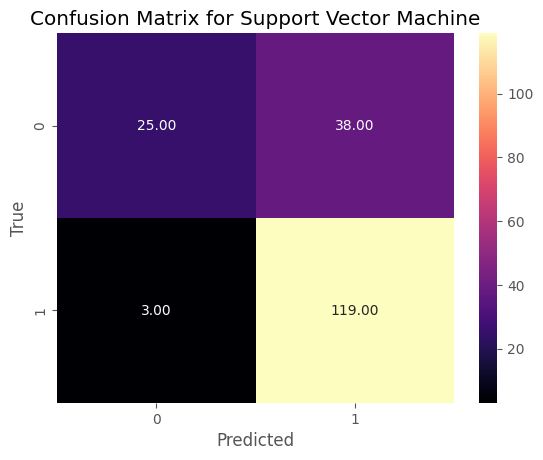

In [49]:
sns.heatmap(cm6, annot=True, fmt='.2f', cmap='magma') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

In [50]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 42, scale_pos_weight = 1)
xgb.fit(X_train, y_train)
y_pred7 = xgb.predict(X_test)

In [51]:
cm7 = confusion_matrix(y_test, y_pred7)
acc_score7 = accuracy_score(y_test, y_pred7)
print(cm7, acc_score7)

[[36 27]
 [28 94]] 0.7027027027027027


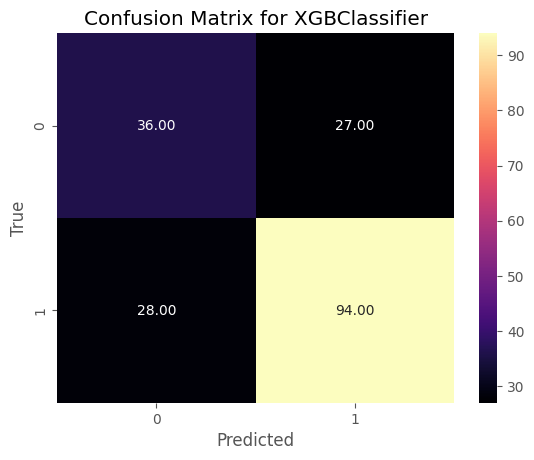

In [52]:
sns.heatmap(cm7, annot=True, fmt='.2f', cmap='magma') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XGBClassifier')
plt.show()

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Logistic Regression
precision_logreg = precision_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)
f1_logreg = f1_score(y_test, y_pred)

# Decision Tree
precision_dtree = precision_score(y_test, y_pred2)
recall_dtree = recall_score(y_test, y_pred2)
f1_dtree = f1_score(y_test, y_pred2)

# Random Forest
precision_rf = precision_score(y_test, y_pred3)
recall_rf = recall_score(y_test, y_pred3)
f1_rf = f1_score(y_test, y_pred3)

# Naive Bayes
precision_nb = precision_score(y_test, y_pred4)
recall_nb = recall_score(y_test, y_pred4)
f1_nb = f1_score(y_test, y_pred4)

# K-Nearest Neighbors
precision_knn = precision_score(y_test, y_pred5)
recall_knn = recall_score(y_test, y_pred5)
f1_knn = f1_score(y_test, y_pred5)

# Support Vector Machine
precision_svm = precision_score(y_test, y_pred6)
recall_svm = recall_score(y_test, y_pred6)
f1_svm = f1_score(y_test, y_pred6)

# XGBClassifier
precision_xgb = precision_score(y_test, y_pred7)
recall_xgb = recall_score(y_test, y_pred7)
f1_xgb = f1_score(y_test, y_pred7)

# Display the results with equal spacing
print(f"{'Model':<20} {'Precision':<20} {'Recall':<20} {'F1-Score':<20}")
print("-" * 80)
print(f"{'Logistic Regression':<22} {precision_logreg:<18.2f} {recall_logreg:<20.2f} {f1_logreg:<20.2f}")
print(f"{'Decision Tree':<22} {precision_dtree:<18.2f} {recall_dtree:<20.2f} {f1_dtree:<20.2f}")
print(f"{'Random Forest':<22} {precision_rf:<18.2f} {recall_rf:<20.2f} {f1_rf:<20.2f}")
print(f"{'Naive Bayes':<22} {precision_nb:<18.2f} {recall_nb:<20.2f} {f1_nb:<20.2f}")
print(f"{'K-Nearest Neighbors':<22} {precision_knn:<18.2f} {recall_knn:<20.2f} {f1_knn:<20.2f}")
print(f"{'Support Vector Machine':<20} {precision_svm:<18.2f} {recall_svm:<20.2f} {f1_svm:<20.2f}")
print(f"{'XGBClassifier':<22} {precision_xgb:<18.2f} {recall_xgb:<20.2f} {f1_xgb:<20.2f}")

Model                Precision            Recall               F1-Score            
--------------------------------------------------------------------------------
Logistic Regression    0.78               0.89                 0.83                
Decision Tree          0.75               0.93                 0.84                
Random Forest          0.76               0.98                 0.86                
Naive Bayes            0.76               0.93                 0.84                
K-Nearest Neighbors    0.75               0.95                 0.84                
Support Vector Machine 0.76               0.98                 0.85                
XGBClassifier          0.78               0.77                 0.77                


**Summary**:
The *Random Forest* model appears to perform the best among the models evaluated, with high precision, recall, and F1-score.

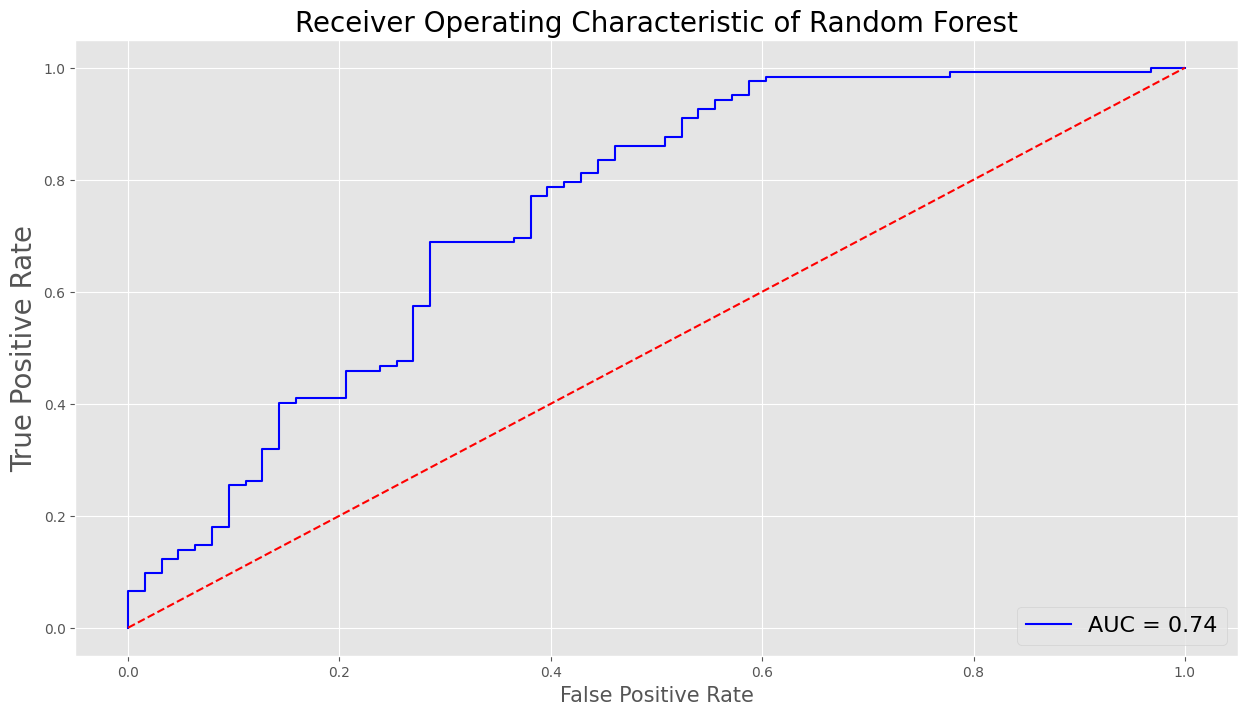

In [54]:
from sklearn import metrics

probs_rf = rfc.predict_proba(X_test)
preds_rf = probs_rf[:, 1]
fpr_rf, tpr_rf, threshold_rf = metrics.roc_curve(y_test, preds_rf)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

# Plotting ROC/AUC for Random Forest
plt.figure(figsize=(15, 8))

plt.plot(fpr_rf, tpr_rf, 'b', label='AUC = %0.2f' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic of Random Forest', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=15)
plt.legend(loc='lower right', prop={'size': 16})

plt.show()

**Receiver Operating Characteristic (ROC)** curve visually represents the performance of a classification model.
- AUC (Area Under the Curve) it quantifies the model's ability to distinguish between positive and negative classes. In my case is generally considered reasonable.
- The red dashed line represents the ROC curve for an ideal classifier. The goal is for the ROC curve of the model to be as close to the top-left corner as possible.